# UNIDAD 3 - PROYECTO: ML

## Nombre del alumno: Abimael Bautista Oliveros
## Número de control: 20120084

# PRESENTACIÓN DEL PROYECTO:
## El proyecto busca que el estudiante pueda utilizar técnicas de Machine Learning para realizar predicciones de un dataset de la vida real.
## En esta ocasión, el dataset es pequeño, por lo que se debe tener especial cuidado cuando se traten los datos y se seleccione el modelo.

# PARTE I: EDA.

## Paso 1. Carga y muestra.
### - Cargue el dataset llamado "cirrhosis.csv" en un dataframe, posteriormente muestre su información.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score



df = pd.read_csv('cirrhosis.csv')

In [2]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

None

## Paso 2. Análisis estadístico.
### - De las columnas numéricas, muestre la información estadística relevante (promedio, cuartíles, desviación estándar y coeficiente de variación).
### - A través del coeficiente de variación determine qué columnas presentan mucha dispersión en sus datos.


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [4]:
numeric_columns = df.select_dtypes(include=np.number)
coef_var = (numeric_columns.std() / numeric_columns.mean()) * 100
print(coef_var)

ID                57.666090
N_Days            57.601585
Age               20.589072
Bilirubin        136.844512
Cholesterol       62.770748
Albumin           12.150933
Copper            87.675713
Alk_Phos         107.955645
SGOT              46.264046
Tryglicerides     52.243406
Platelets         38.255325
Prothrombin        9.523164
Stage             29.165437
dtype: float64


In [5]:
## Parece que las columnas con un coeficiente de variacion mas alto son  Bilirubin y Alk_Phos, estas muestran una mayor dispersión en sus datos en comparación con otras columnas.

## Paso 3. Búsqueda de nulos y datos atípicos.
### - Muestre cuántos datos nulos tienen las columnas, puede apoyarse de un gráfico para mostrar la cantidad de nulos que hay.
### - Muestre las distribuciones de las columnas numéricas y mencione si presentan datos atípicos/anomalías/outliers.


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

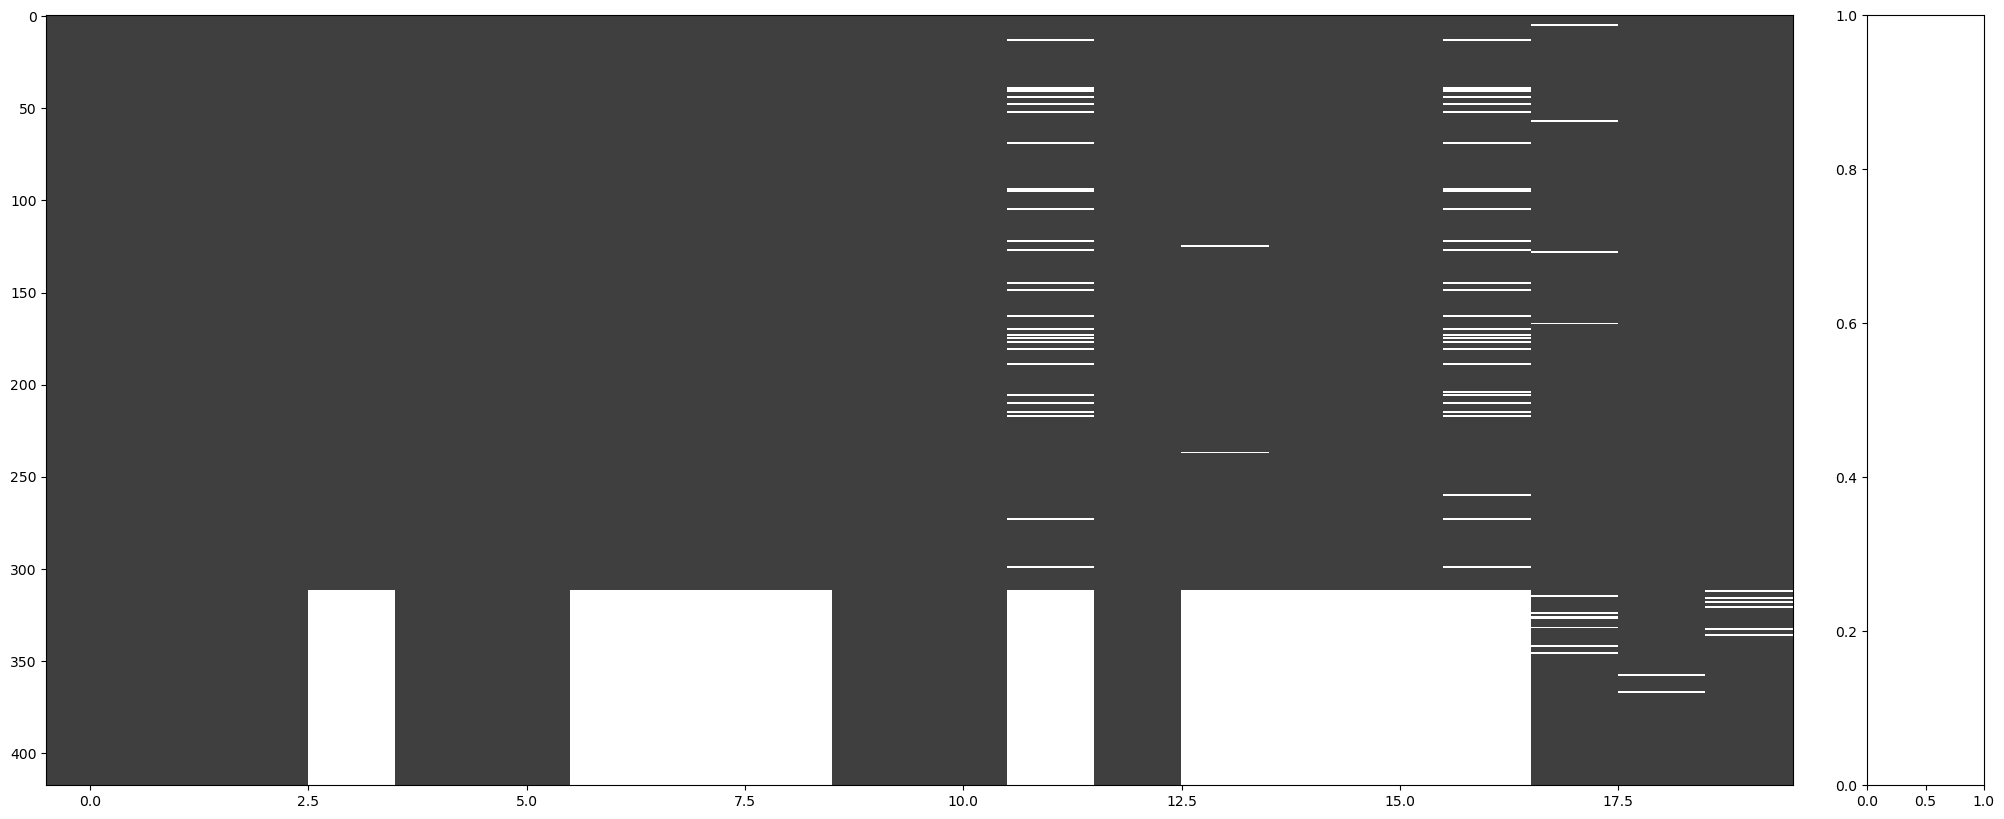

In [13]:
msno.matrix(df)

In [14]:
null_counts = df.isnull().sum()

print(null_counts)

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


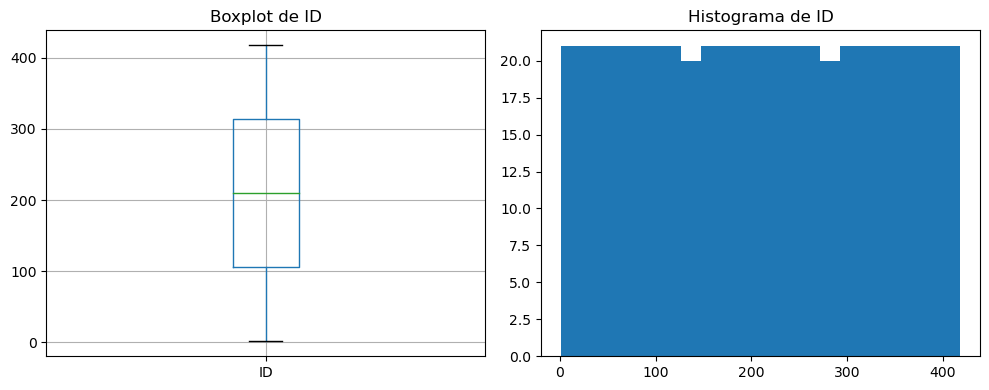

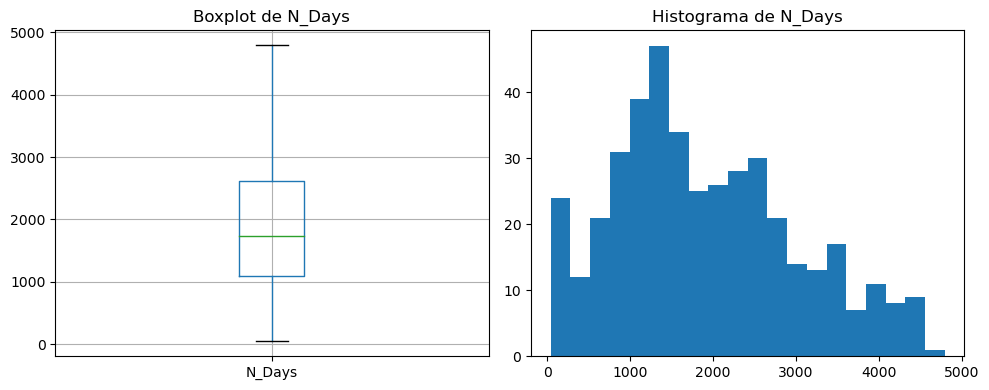

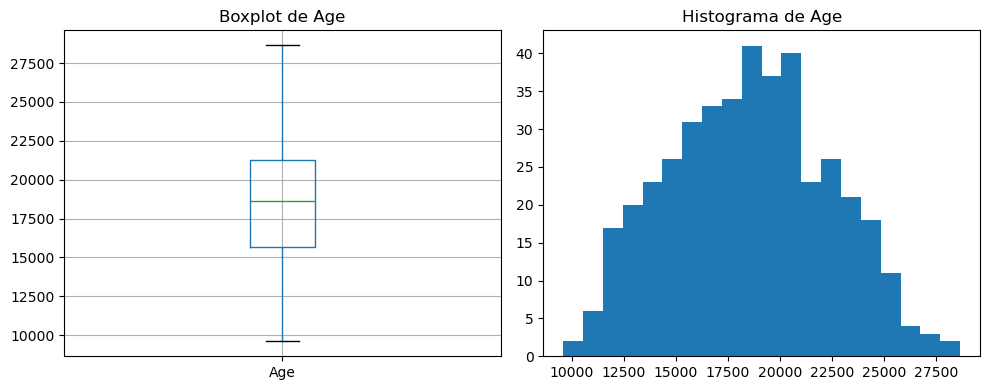

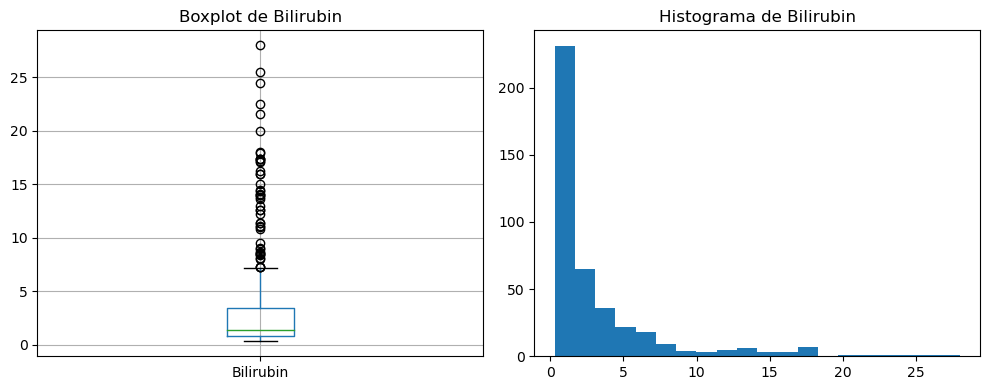

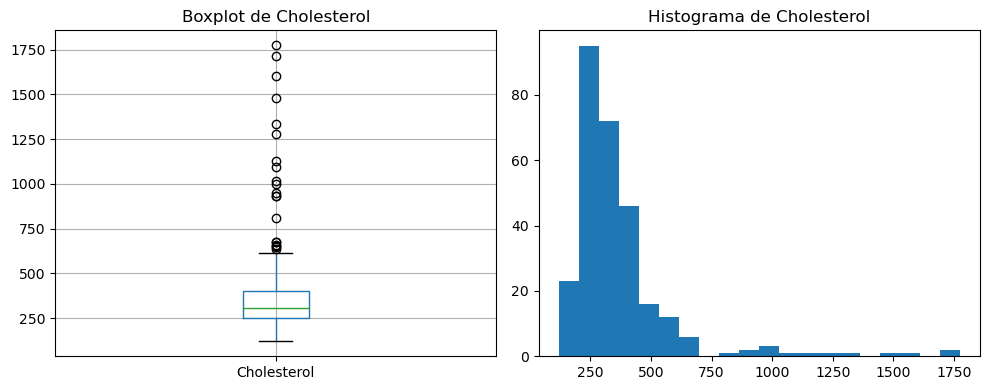

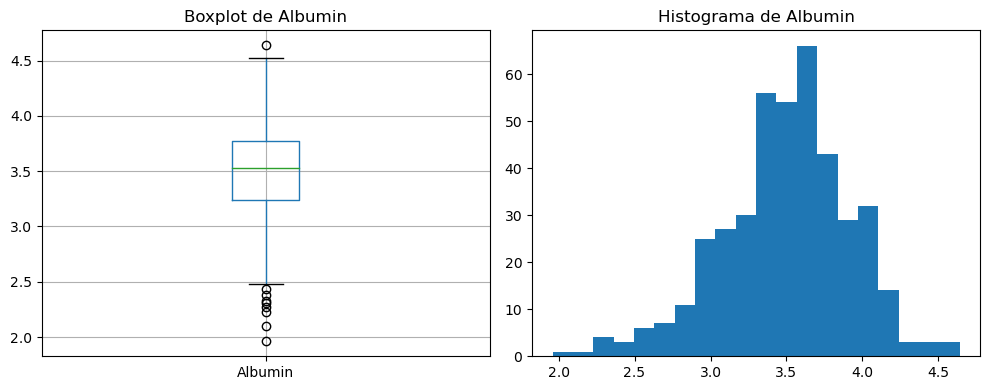

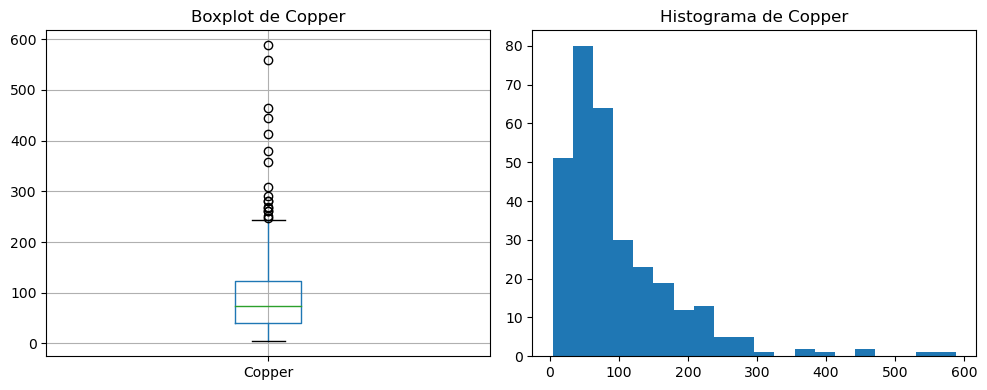

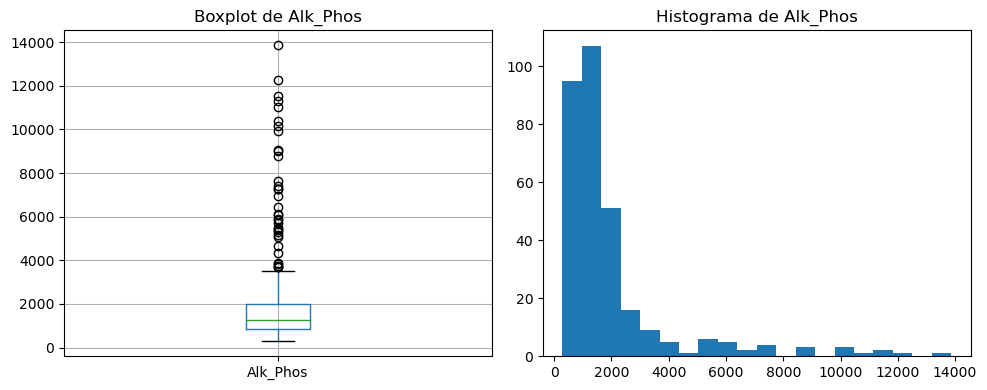

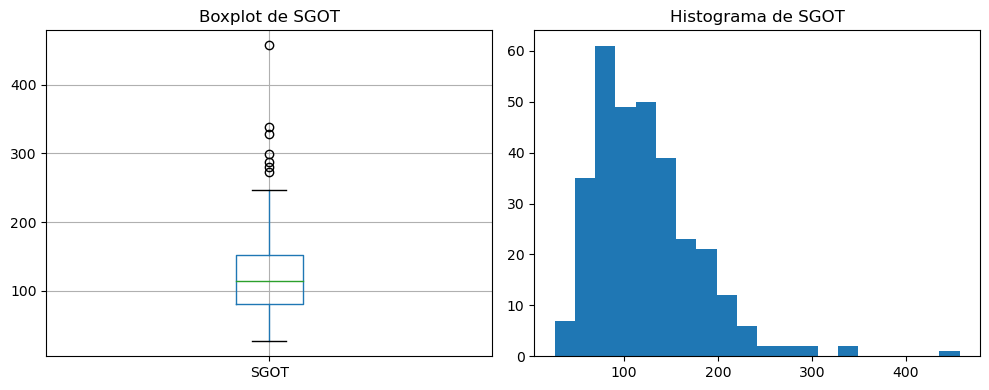

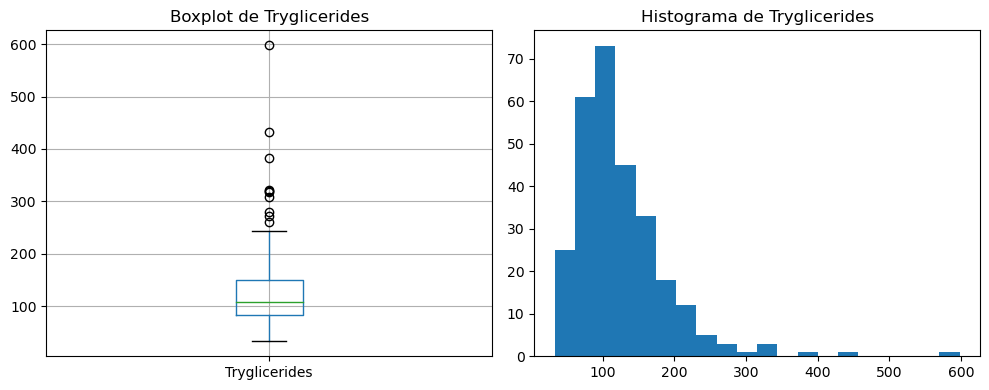

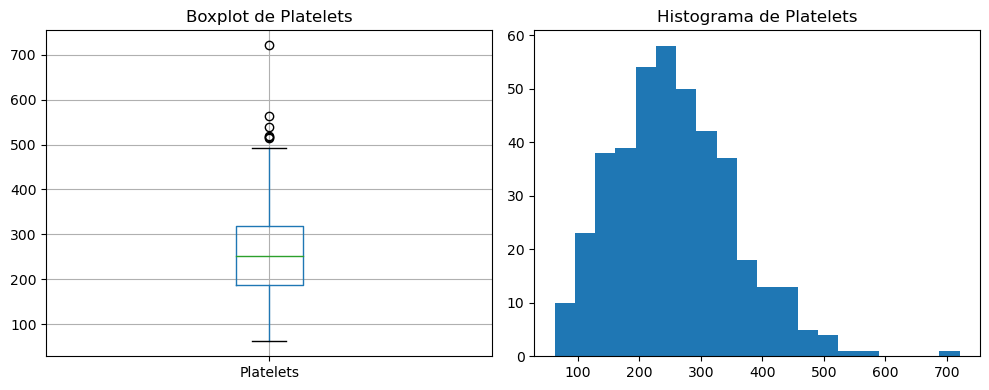

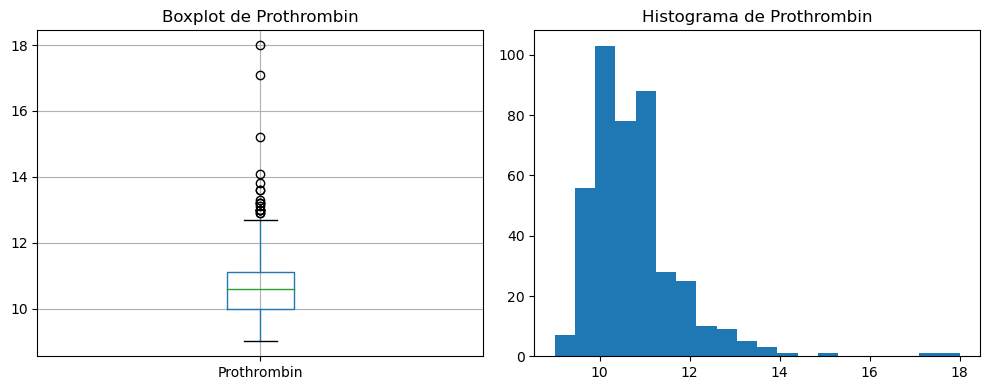

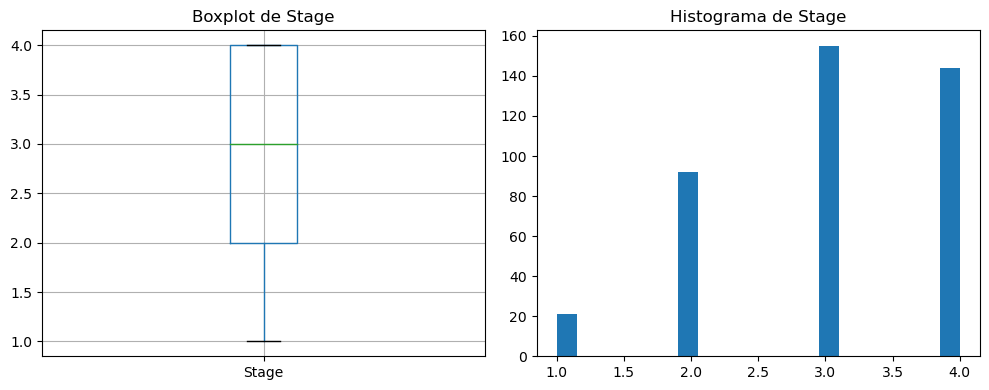

In [15]:
numeric_columns = df.select_dtypes(include=np.number)

for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    df.boxplot(column=[column])
    plt.title(f'Boxplot de {column}')
    
    plt.subplot(1, 2, 2)
    df[column].hist(bins=20, grid=False)
    plt.title(f'Histograma de {column}')
    
    plt.tight_layout()
    plt.show()

## Paso 4. Análisis de categorización.
### - Revise las columnas que son de tipo objeto, analice la cantidad de posibilidades que tienen.
### - Determine si una (o algunas) puede ser categorizable, aún no la(s) categorice.

In [16]:
tipos_de_datos = df.dtypes
num_numericas = tipos_de_datos[tipos_de_datos != 'object'].count()
num_objeto = tipos_de_datos[tipos_de_datos == 'object'].count()
print(f"Columnas numéricas: {num_numericas}")
print(f"Columnas de tipo objeto: {num_objeto}")

Columnas numéricas: 13
Columnas de tipo objeto: 7


In [17]:
object_columns = df.select_dtypes(include='object')

for column in object_columns:
    unique_count = df[column].nunique()
    print(f"La columna '{column}' tiene {unique_count} valores únicos.")

La columna 'Status' tiene 3 valores únicos.
La columna 'Drug' tiene 2 valores únicos.
La columna 'Sex' tiene 2 valores únicos.
La columna 'Ascites' tiene 2 valores únicos.
La columna 'Hepatomegaly' tiene 2 valores únicos.
La columna 'Spiders' tiene 2 valores únicos.
La columna 'Edema' tiene 3 valores únicos.


In [18]:
## 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders' y 'Edema' podrían representar características categóricas.

## Paso 5. Correlación y análisis del problema.
### - Muestre la correlación de los datos numéricos con respecto a la columna "Status", para ello tendrá que volver numérica dicha columna (para este paso puede usar un encoder).
### - El objetivo es predecir con estos datos la variable "Status".
### - ¿Con los datos que se tienen se puede predecir correctamente esa variable?
#### Con los datos no son suficientes para la prediccion aunque los coeficientes de correlacion que se ven indican la relacion lineal entre las variables numericas y la variable objeto.
### - Si tuviera que seleccionar un modelo para hacer las predicciones, ¿cuál sería?
#### El modelo con el que lo haria seria la regresion logistica ya que pienso que funcionaria bien para estos datos.

In [19]:
df_encoded = df.copy()
encoder = LabelEncoder()
df_encoded['Status_encoded'] = encoder.fit_transform(df_encoded['Status'])
numeric_columns = df_encoded.select_dtypes(include=np.number)
correlation_status = numeric_columns.corrwith(df_encoded['Status_encoded'])
print(correlation_status)

ID               -0.282416
N_Days           -0.416651
Age               0.191525
Bilirubin         0.429722
Cholesterol       0.187275
Albumin          -0.261674
Copper            0.388296
Alk_Phos          0.225822
SGOT              0.294376
Tryglicerides     0.212486
Platelets        -0.083823
Prothrombin       0.339424
Stage             0.320291
Status_encoded    1.000000
dtype: float64


# PARTE II: MANIPULACIÓN Y TRATAMIENTO.

## Paso 1. Tratamiento de datos nulos.
### - Trate los datos nulos acorde a lo que se ha visto previamente en el curso.
### - Muestre la cantidad de datos nulos antes y después del tratamiento.


In [20]:
pd.options.display.max_rows = 0
datos_nulos = df.isnull().sum()
print(datos_nulos)

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [21]:
limite = len(df) * 0.5
print(limite)

209.0


In [22]:
limite = 209.0
nulos_columna = df.isnull().sum()
exceso = nulos_columna[nulos_columna > limite]
print("Columnas con exceso de nulos:")
print(exceso)

Columnas con exceso de nulos:
Series([], dtype: int64)


In [23]:
colum_eliminar = df.columns[df.isna().sum() <= limite].copy()
print(colum_eliminar)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


In [24]:
pd.options.display.max_rows = 0
df_limpio = df.dropna(subset=colum_eliminar).copy()
print(df_limpio.isna().sum().sort_values(ascending=False))

ID               0
N_Days           0
Prothrombin      0
Platelets        0
Tryglicerides    0
SGOT             0
Alk_Phos         0
Copper           0
Albumin          0
Cholesterol      0
Bilirubin        0
Edema            0
Spiders          0
Hepatomegaly     0
Ascites          0
Sex              0
Age              0
Drug             0
Status           0
Stage            0
dtype: int64


## Paso 2. Tratamiento de anomalías.
### - Enfrente los datos extremos y las anomalías.
### - Es libre de utilizar los métodos que prefiera, trate de no perder muchos datos (se tiene un dataset pequeño).
### - Muestre las distribuciones tratadas antes y después del tratamiento.

In [25]:
columnas_numericas = df_limpio.select_dtypes(include=['int64', 'float64']).copy()
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)
IQR = Q3 - Q1

print("Rango Intercuartílico (IQR) de las columnas numéricas:")

print(IQR)

Rango Intercuartílico (IQR) de las columnas numéricas:
ID                160.5000
N_Days           1504.0000
Age              5505.0000
Bilirubin           2.7250
Cholesterol       151.5000
Albumin             0.4625
Copper             86.5000
Alk_Phos         1145.7500
SGOT               70.9925
Tryglicerides      66.2500
Platelets         118.2500
Prothrombin         1.2000
Stage               2.0000
dtype: float64


## Paso 3. Categorización.
### - Seleccione las columnas de tipo objeto candidatas a la categorización.
### - Realice la categorización.
### - Muestre la información del dataframe para demostrar que se realizó con éxito.

In [26]:
columns_to_encode = ['Sex', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders']

df_encoded = df.copy()

encoder = OneHotEncoder(sparse=False, drop='first')

encoded_columns = encoder.fit_transform(df_encoded[columns_to_encode])
encoded_column_names = encoder.get_feature_names_out(input_features=columns_to_encode)

df_encoded = pd.concat([df_encoded.drop(columns_to_encode, axis=1),
                        pd.DataFrame(encoded_columns, columns=encoded_column_names)],
                        axis=1)

print(df_encoded.head())

   ID  N_Days Status    Age Edema  Bilirubin  Cholesterol  Albumin  Copper  \
0   1     400      D  21464     Y       14.5        261.0     2.60   156.0   
1   2    4500      C  20617     N        1.1        302.0     4.14    54.0   
2   3    1012      D  25594     S        1.4        176.0     3.48   210.0   
3   4    1925      D  19994     S        1.8        244.0     2.54    64.0   
4   5    1504     CL  13918     N        3.4        279.0     3.53   143.0   

   Alk_Phos  ...  Stage  Sex_M  Drug_Placebo  Drug_nan  Ascites_Y  \
0    1718.0  ...    4.0    0.0           0.0       0.0        1.0   
1    7394.8  ...    3.0    0.0           0.0       0.0        0.0   
2     516.0  ...    4.0    1.0           0.0       0.0        0.0   
3    6121.8  ...    4.0    0.0           0.0       0.0        0.0   
4     671.0  ...    3.0    0.0           1.0       0.0        0.0   

   Ascites_nan  Hepatomegaly_Y  Hepatomegaly_nan  Spiders_Y  Spiders_nan  
0          0.0             1.0           

C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
## Paso 4. Tratamiento de incosistencias.
### - En la categorización anterior, ¿hay inconsistencias?
#### No vi ninguna inconsistencia.
### - Revise las posibles opciones de cada columna categorizada, si encuentra alguna inconsistencia hay que tratarla.
### - Puede emplear gráficas de conteos para validar si una categoría se podría considerar como inconsistente.

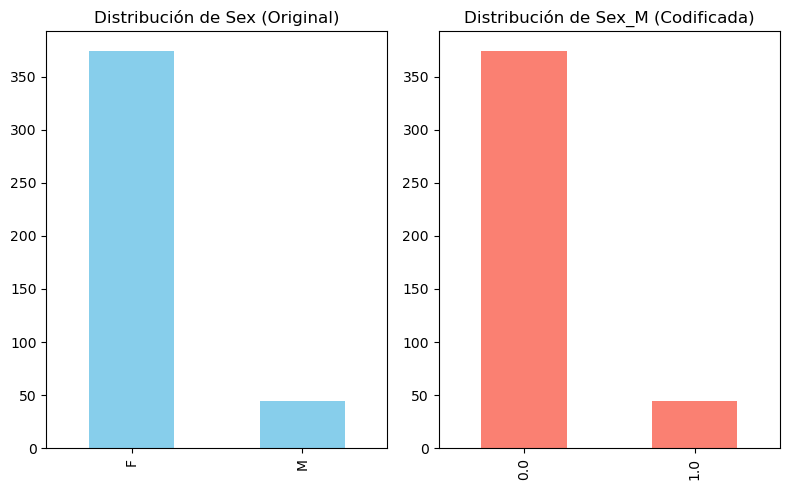

In [30]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
df['Sex'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Sex (Original)')
plt.subplot(1, 2, 2)
df_encoded['Sex_M'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribución de Sex_M (Codificada)')

plt.tight_layout()
plt.show()

## Paso 5. Conversión a numérico.
### - Ya que tiene un dataframe sin datos nulos, sin inconsistencias y sin anomalías, hay que convertirlo a numérico.
### - Emplee un tipo de encoding adecuado a cada columna.
### - Construya un nuevo dataframe completamente numérico (incluyendo "Status", este debe ser forzosamente mediante LabelEncoding).
### - Muestre la información del nuevo dataframe.

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_numeric = df.copy()

label_encoder = LabelEncoder()
df_numeric['Status_LabelEncoded'] = label_encoder.fit_transform(df['Status'])

columns_categorical = ['Sex', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders']
columns_numeric = [col for col in df.columns if col not in columns_categorical and col != 'Status']

encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_categorical])
encoded_column_names = encoder.get_feature_names_out(columns_categorical)
df_encoded = pd.DataFrame(encoded_columns, columns=encoded_column_names)

df_numeric = pd.concat([df[columns_numeric], df_encoded, df_numeric['Status_LabelEncoded']], axis=1)

print(df_numeric.head())

   ID  N_Days    Age Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0   1     400  21464     Y       14.5        261.0     2.60   156.0    1718.0   
1   2    4500  20617     N        1.1        302.0     4.14    54.0    7394.8   
2   3    1012  25594     S        1.4        176.0     3.48   210.0     516.0   
3   4    1925  19994     S        1.8        244.0     2.54    64.0    6121.8   
4   5    1504  13918     N        3.4        279.0     3.53   143.0     671.0   

     SGOT  ...  Ascites_N  Ascites_Y  Ascites_nan  Hepatomegaly_N  \
0  137.95  ...        0.0        1.0          0.0             0.0   
1  113.52  ...        1.0        0.0          0.0             0.0   
2   96.10  ...        1.0        0.0          0.0             1.0   
3   60.63  ...        1.0        0.0          0.0             0.0   
4  113.15  ...        1.0        0.0          0.0             0.0   

   Hepatomegaly_Y  Hepatomegaly_nan  Spiders_N  Spiders_Y  Spiders_nan  \
0             1.0       

C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
df_numeric = pd.concat([df_numeric.drop('Edema', axis=1), pd.get_dummies(df_numeric['Edema'], prefix='Edema')], axis=1)

In [38]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    418 non-null    int64  
 1   N_Days                418 non-null    int64  
 2   Age                   418 non-null    int64  
 3   Bilirubin             418 non-null    float64
 4   Cholesterol           284 non-null    float64
 5   Albumin               418 non-null    float64
 6   Copper                310 non-null    float64
 7   Alk_Phos              312 non-null    float64
 8   SGOT                  312 non-null    float64
 9   Tryglicerides         282 non-null    float64
 10  Platelets             407 non-null    float64
 11  Prothrombin           416 non-null    float64
 12  Stage                 412 non-null    float64
 13  Sex_F                 418 non-null    float64
 14  Sex_M                 418 non-null    float64
 15  Drug_D-penicillamine  4

# PARTE III: MACHINE LEARNING.

## Paso 1. División de los datos.
### - Divide las columnas en la variable "X" y la variable "y".
### - Muestree los datos en dos: entrenamiento y pruebas. La proporción de cada muestra queda a decisión suya.
### - Utilice una semilla para que los resultados puedan ser reproducibles.


In [39]:
y = df_numeric['Status_LabelEncoded']
X = df_numeric.drop('Status_LabelEncoded', axis=1)
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (418, 30)
Shape de y: (418,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (334, 30)
Forma de X_test: (84, 30)
Forma de y_train: (334,)
Forma de y_test: (84,)


## Paso 2. Abordaje mediante modelo simple.
### - Importe un modelo simple de ML, puede ser KNN, Regresión Logística o un árbol de decisión.
### - Entrene el modelo con los datos y realice las predicciones con la muestra de pruebas.
### - Muestre los resultados con f1_score, accuracy_score y classification_report.
### - Analizando el reporte de clasificación, ¿qué tal se desempeñó su modelo?

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)

modelo_logistico.fit(X_train_imputed, y_train)


C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

## Paso 3. Mejorando el modelo.
### - Emplee GridSearchCV para encontrar los mejores hiperparámetros para su modelo.
### - Valide con varias opciones.
### - Si su modelo no logra mejorar mucho, no se preocupe, es parte del aprendizaje.

In [48]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']
}

modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(estimator=modelo_logistico, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_imputed, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor puntuación en la validación cruzada:")
print(grid_search.best_score_)

mejor_modelo = grid_search.best_estimator_

accuracy = mejor_modelo.score(X_test_imputed, y_test)
print("Exactitud en el conjunto de prueba:")
print(accuracy)

C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ABIMAEL\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ABIMAEL\anaconda3\Lib\site-packages\scipy\optimize\_lines

C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ABIMAEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Mejores hiperparámetros encontrados:
{'C': 0.1, 'solver': 'newton-cg'}
Mejor puntuación en la validación cruzada:
0.8263229308005429
Exactitud en el conjunto de prueba:
0.8809523809523809


## Paso 4. Ensambles.
### - Utilice el ensamble de VotingClassifier para mejorar el rendimiento.
### - Seleccione al menos 4 modelos simples diferentes y úselos dentro del ensamble (Stacking).
### - Entrene el meta-modelo y valide su rendimiento con f1_score, accuracy_score y classification_report.
### - Analizando el classification_report, ¿qué tal se desempeñó el modelo?
#### El modelo tuvo un buen desempeño en general, con métricas sólidas para ambas clases (0 y 1).

In [52]:
modelo_logistico = LogisticRegression(random_state=42, C=0.1, solver='newton-cg', max_iter=1000)
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_knn = KNeighborsClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', modelo_logistico), ('dt', modelo_arbol), ('knn', modelo_knn)],
    voting='soft'
)

voting_clf.fit(X_train_imputed, y_train)

accuracy_voting = voting_clf.score(X_test_imputed, y_test)
print("Exactitud del VotingClassifier en el conjunto de prueba:", accuracy_voting)

C:\Users\ABIMAEL\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ABIMAEL\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Exactitud del VotingClassifier en el conjunto de prueba: 0.8095238095238095


C:\Users\ABIMAEL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ABIMAEL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

modelo_rf = RandomForestClassifier(random_state=42)
modelo_svc = SVC(random_state=42, probability=True)
modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_lr = LogisticRegression(random_state=42)

estimadores = [
    ('rf', modelo_rf),
    ('svc', modelo_svc),
    ('gb', modelo_gb),
    ('lr', modelo_lr)
]
stacking_clf = StackingClassifier(estimators=estimadores, final_estimator=LogisticRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stacking_clf.fit(X_train, y_train)

accuracy_stacking = stacking_clf.score(X_test, y_test)
print("Exactitud del StackingClassifier en el conjunto de prueba:", accuracy_stacking)

Exactitud del StackingClassifier en el conjunto de prueba: 0.895


In [58]:
stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"F1-Score: {f1}")
print(f"Reporte de Clasificación:\n{report}")

Exactitud: 0.895
F1-Score: 0.8975609756097561
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        93
           1       0.94      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



## Paso 5. Modelo supremo.
### - Con los resultados del paso 4 y 5, determine qué camino seguirá: tomar un modelo y mejorarlo o usar el meta-modelo y mejorarlo.
### - Mejore su modelo hasta el máximo, para eso se recomienda utilizar una Pipeline (puede ser con Pipeline o make_pipeline).
### - Dependiendo del modelo que haya seleccionado, debe buscar mejores hiperparámetros, escalar, normalizar, estandarizar o hacer cambios importantes en los datos (como seleccionar únicamente las variables de mayor correlación), también puede emplear PCA para reducir dimensionalidad.
### - El objetivo es que el modelo generado en este paso sea superior a los modelos del paso 4 y 5.
### - Para este paso también puede utilizar las SVM, RandomForest y Redes Neuronales Artificiales (SKLearn).

# PARTE IV. PRESENTACIÓN.
## - Emplee PCA con las columnas de la variable X (con los datos completos) y reduzca su dimensionalidad a 2.
## - Muestre un gráfico de dispersión entre esas dos características PCA y colorice con la columna "Status". Para esto puede construir un nuevo dataframe con las 2 columnas obtenidas por PCA y añadiendo la columna "Status" antes de la transformación.
## - Analice si los grupos se pueden separar dentro de ese gráfico.
## - Suba este proyecto a su propio repositorio en GitHub.
## - Documente en un README el proceso realizado en este proyecto.
## - Brinde el enlace al entregar el proyecto en Teams.


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy}")

Exactitud del modelo: 0.73


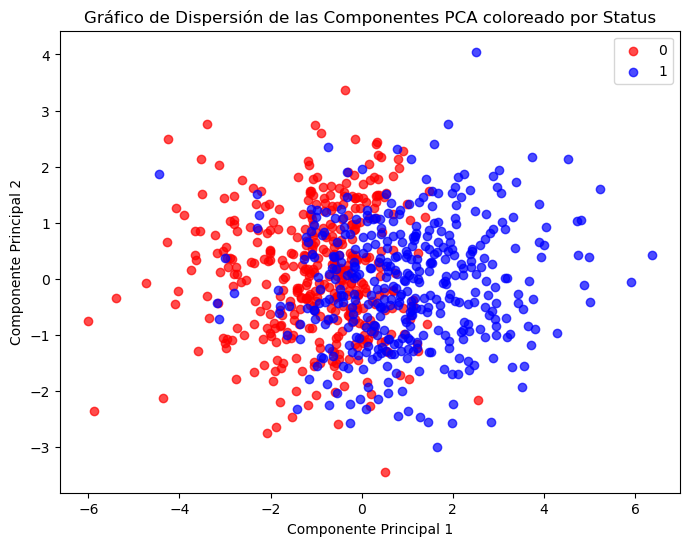

In [66]:
status_df = pd.DataFrame(y_train, columns=['Status'])

pca_df = pd.DataFrame(X_train_pca, columns=['Componente_1', 'Componente_2'])
pca_df = pd.concat([pca_df, status_df], axis=1)

plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'blue'}  # Asumiendo que la columna 'Status' tiene valores binarios
for status, color in colors.items():
    subset = pca_df[pca_df['Status'] == status]
    plt.scatter(subset['Componente_1'], subset['Componente_2'], c=color, label=status, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Dispersión de las Componentes PCA coloreado por Status')
plt.legend()
plt.show()

In [ ]:
#Por como se ven los grupos si se podran separar.